In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
animal = pd.read_csv("../data/animal_smiles_r_v3.csv")
human_lombardo = pd.read_csv("../data/human_smiles_r_v3.csv")

In [4]:
animal = animal[animal["smiles_r"]!="Cannot_do"].reset_index(drop=True)
human_lombardo = human_lombardo[human_lombardo["smiles_r"]!="Cannot_do"].reset_index(drop=True)

In [5]:
animal

,CHEMISTRY,NAME,human_CL_mL_min_kg,rat_CL_mL_min_kg,dog_CL_mL_min_kg,monkey_CL_mL_min_kg,human_VDss_L_kg,rat_VDss_L_kg,dog_VDss_L_kg,monkey_VDss_L_kg,human_fup,rat_fup,dog_fup,monkey_fup,smiles_r,InChICode_standardised,molecular_weight_smiles_r
0,Fc1c[nH]c(=O)[nH]c1=O,5-Fluorouracil,26.0,33.0,NaN,NaN,0.23,0.25,NaN,NaN,0.6400,0.690,NaN,NaN,O=c1[n-]cc(F)c(=O)[n-]1,"InChI=1S/C4H3FN2O2/c5-2-1-6-4(9)7-3(2)8/h1H,(H...",128.003303
1,[nH]1cnc(=S)c(c12)[nH]cn2,6-Mercaptopurine,15.0,NaN,NaN,15.2,1.00,NaN,NaN,0.9,0.8500,NaN,NaN,NaN,S=c1nc[n-]c2nc[n-]c12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...,150.001114
2,CO[C@@H]1[C@H](NC)C[C@@H](O2)n(c3c4n5[C@]12C)c...,7-Hydroxystaurosporine,0.0,65.0,10.20,NaN,0.15,16.70,6.09,NaN,0.0022,NaN,0.0074,NaN,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,InChI=1S/C28H26N4O4/c1-28-25(35-3)15(29-2)12-1...,483.202682
3,C1OC(=O)[C@](O)(CC)c(c12)cc3n(c2=O)Cc4c3nc5c(c...,9-Aminocamptothecin,6.5,150.0,NaN,NaN,2.20,5.00,NaN,NaN,0.0030,NaN,NaN,NaN,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc...,InChI=1S/C20H17N3O4/c1-2-20(26)13-7-16-17-10(6...,363.121906
4,OC[C@@H]1C=C[C@@H](C1)n(cn2)c(c23)nc(N)nc3NC4CC4,Abacavir,13.0,30.0,NaN,NaN,0.84,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,Nc1nc([NH2+]C2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)...,InChI=1S/C14H18N6O/c15-14-18-12(17-9-2-3-9)11-...,287.161486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OC[C@@H](O)[C@@H](O)[C@H]1[C@H](NC(=O)C)[C@H](...,Zamivir,1.6,31.7,NaN,NaN,0.23,0.80,NaN,NaN,0.8600,NaN,NaN,NaN,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,InChI=1S/C12H20N4O7/c1-4(18)15-8-5(16-12(13)14...,332.133199
367,[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)n2cc(C)c(=...,Zidovudine,25.0,25.1,14.00,NaN,1.80,0.86,1.00,NaN,0.8000,0.687,0.8270,0.707,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,InChI=1S/C10H13N5O4/c1-5-3-15(10(18)12-9(5)17)...,266.089477
368,OP(=O)(O)C(O)(P(=O)(O)O)Cn1ccnc1,Zoledronic Acid,2.2,NaN,4.13,NaN,0.60,NaN,0.28,NaN,0.7800,NaN,NaN,NaN,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],"InChI=1S/C5H10N2O7P2/c8-5(15(9,10)11,16(12,13)...",267.967218
369,O=C1OC[C@@H](N1)Cc(cc2)cc(c23)c(c[nH]3)CCN(C)C,Zolmitriptan,6.7,29.4,NaN,NaN,1.80,3.53,NaN,NaN,0.7500,NaN,NaN,NaN,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,InChI=1S/C16H21N3O2/c1-19(2)6-5-12-9-17-15-4-3...,288.170653


In [6]:
human_lombardo = human_lombardo.rename(columns={"human VDss (L/kg)": "human_VDss_L_kg"})
human_lombardo = human_lombardo.rename(columns={"fraction unbound \nin plasma (fu)": "human_fup"})
human_lombardo = human_lombardo.rename(columns={"human CL (mL/min/kg)": "human_CL_mL_min_kg"})
human_lombardo = human_lombardo.rename(columns={"MRT (h)": "human_mrt"})
human_lombardo = human_lombardo.rename(columns={"terminal  t1/2 (h)": "human_thalf"})
human_lombardo

,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,MW,HBA,HBD,TPSA_NO,RotBondCount,MoKa.LogP,MoKa.LogD7.4,molecular_weight_smiles_r
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,1.015,4.35,0.33,3.70,15.00,477.47,12.0,5.0,207.3,11.0,0.35,-6.00,475.161514
1,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,12.000,8.90,NaN,22.30,50.70,300.44,2.0,1.0,37.3,6.0,5.40,5.40,299.201654
2,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.530,0.29,0.01,30.38,78.50,532.53,12.0,4.0,169.8,11.0,2.40,-2.60,529.176450
3,C#CC[NH+](C)C(C)Cc1ccccc1,1.900,20.00,0.13,1.60,1.30,187.28,1.0,0.0,3.2,5.0,2.80,2.30,188.143376
4,C#C[C@@]1(O)[C@@H](CO)O[C@H](n2ccc(N)nc2=O)[C@...,1.100,1.60,NaN,11.70,10.90,267.24,8.0,4.0,130.8,3.0,-3.20,-3.20,267.085521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,3.600,8.00,NaN,10.50,8.20,220.27,4.0,1.0,33.7,1.0,0.93,-0.46,221.128454
1279,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,6.900,5.10,0.35,23.00,16.00,243.39,1.0,0.0,3.2,2.0,5.30,3.70,244.205976
1280,c1ccc(C2(c3ccccc3)CC2C2=[NH+]CCN2)cc1,4.100,8.60,0.50,7.80,7.30,262.35,2.0,1.0,24.4,3.0,2.80,-0.64,263.154275
1281,c1ccc(CN(CC2=[NH+]CCN2)c2ccccc2)cc1,3.900,19.67,NaN,3.45,2.29,265.35,3.0,1.0,27.6,5.0,2.80,0.28,266.165174


In [7]:
animal

,CHEMISTRY,NAME,human_CL_mL_min_kg,rat_CL_mL_min_kg,dog_CL_mL_min_kg,monkey_CL_mL_min_kg,human_VDss_L_kg,rat_VDss_L_kg,dog_VDss_L_kg,monkey_VDss_L_kg,human_fup,rat_fup,dog_fup,monkey_fup,smiles_r,InChICode_standardised,molecular_weight_smiles_r
0,Fc1c[nH]c(=O)[nH]c1=O,5-Fluorouracil,26.0,33.0,NaN,NaN,0.23,0.25,NaN,NaN,0.6400,0.690,NaN,NaN,O=c1[n-]cc(F)c(=O)[n-]1,"InChI=1S/C4H3FN2O2/c5-2-1-6-4(9)7-3(2)8/h1H,(H...",128.003303
1,[nH]1cnc(=S)c(c12)[nH]cn2,6-Mercaptopurine,15.0,NaN,NaN,15.2,1.00,NaN,NaN,0.9,0.8500,NaN,NaN,NaN,S=c1nc[n-]c2nc[n-]c12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...,150.001114
2,CO[C@@H]1[C@H](NC)C[C@@H](O2)n(c3c4n5[C@]12C)c...,7-Hydroxystaurosporine,0.0,65.0,10.20,NaN,0.15,16.70,6.09,NaN,0.0022,NaN,0.0074,NaN,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,InChI=1S/C28H26N4O4/c1-28-25(35-3)15(29-2)12-1...,483.202682
3,C1OC(=O)[C@](O)(CC)c(c12)cc3n(c2=O)Cc4c3nc5c(c...,9-Aminocamptothecin,6.5,150.0,NaN,NaN,2.20,5.00,NaN,NaN,0.0030,NaN,NaN,NaN,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc...,InChI=1S/C20H17N3O4/c1-2-20(26)13-7-16-17-10(6...,363.121906
4,OC[C@@H]1C=C[C@@H](C1)n(cn2)c(c23)nc(N)nc3NC4CC4,Abacavir,13.0,30.0,NaN,NaN,0.84,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,Nc1nc([NH2+]C2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)...,InChI=1S/C14H18N6O/c15-14-18-12(17-9-2-3-9)11-...,287.161486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OC[C@@H](O)[C@@H](O)[C@H]1[C@H](NC(=O)C)[C@H](...,Zamivir,1.6,31.7,NaN,NaN,0.23,0.80,NaN,NaN,0.8600,NaN,NaN,NaN,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,InChI=1S/C12H20N4O7/c1-4(18)15-8-5(16-12(13)14...,332.133199
367,[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)n2cc(C)c(=...,Zidovudine,25.0,25.1,14.00,NaN,1.80,0.86,1.00,NaN,0.8000,0.687,0.8270,0.707,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,InChI=1S/C10H13N5O4/c1-5-3-15(10(18)12-9(5)17)...,266.089477
368,OP(=O)(O)C(O)(P(=O)(O)O)Cn1ccnc1,Zoledronic Acid,2.2,NaN,4.13,NaN,0.60,NaN,0.28,NaN,0.7800,NaN,NaN,NaN,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],"InChI=1S/C5H10N2O7P2/c8-5(15(9,10)11,16(12,13)...",267.967218
369,O=C1OC[C@@H](N1)Cc(cc2)cc(c23)c(c[nH]3)CCN(C)C,Zolmitriptan,6.7,29.4,NaN,NaN,1.80,3.53,NaN,NaN,0.7500,NaN,NaN,NaN,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,InChI=1S/C16H21N3O2/c1-19(2)6-5-12-9-17-15-4-3...,288.170653


In [8]:
human_lombardo.columns

Index(['smiles_r', 'human_VDss_L_kg', 'human_CL_mL_min_kg', 'human_fup',
       'human_mrt', 'human_thalf', 'MW', 'HBA', 'HBD', 'TPSA_NO',
       'RotBondCount', 'MoKa.LogP', 'MoKa.LogD7.4',
       'molecular_weight_smiles_r'],
      dtype='object')

In [15]:
pd.merge(human_lombardo,animal, how="inner", left_on="smiles_r", right_on="smiles_r")

,smiles_r,human_VDss_L_kg_x,human_CL_mL_min_kg_x,human_fup_x,human_mrt,human_thalf,MW,HBA,HBD,TPSA_NO,...,human_VDss_L_kg_y,rat_VDss_L_kg,dog_VDss_L_kg,monkey_VDss_L_kg,human_fup_y,rat_fup,dog_fup,monkey_fup,InChICode_standardised,molecular_weight_smiles_r_y
0,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,12.00,8.90,NaN,22.3,50.7,300.44,2.0,1.0,37.3,...,12.00,7.90,24.8,10.40,0.0007,NaN,NaN,NaN,InChI=1S/C20H28O2/c1-8-9-10-11-17(21)14-12-15(...,299.201654
1,C#C[C@]1(O)CC[C@H]2[C@@H]3CC=C4CC(=O)CCC4[C@H]...,1.50,1.80,0.025,14.0,9.4,312.45,2.0,1.0,37.3,...,1.50,0.74,NaN,NaN,0.0250,NaN,NaN,NaN,InChI=1S/C21H28O2/c1-3-20-11-9-17-16-8-6-15(22...,312.208930
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc(OS(=O)(=O)[O-...,2.30,4.70,0.011,8.2,8.4,376.47,5.0,2.0,83.8,...,2.30,NaN,NaN,21.00,0.0110,NaN,NaN,NaN,InChI=1S/C20H24O5S/c1-3-20(21)11-9-18-17-6-4-1...,375.127168
3,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,4.30,7.00,0.014,11.0,9.7,296.40,2.0,2.0,40.5,...,4.30,5.70,17.0,7.20,0.0140,0.0088,NaN,0.0099,InChI=1S/C20H24O2/c1-3-20(22)11-9-18-17-6-4-13...,295.170354
4,C#C[C@]1(OS(=O)(=O)[O-])CC[C@H]2[C@@H]3CCc4cc(...,0.61,1.30,NaN,7.8,9.3,376.47,5.0,2.0,83.8,...,0.61,NaN,NaN,8.70,NaN,NaN,NaN,NaN,"InChI=1S/C20H24O5S/c1-3-20(25-26(22,23)24)11-9...",374.119892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,[NH3+]Cc1ccccc1CC(=O)NC1C(=O)[NH+]2C(C(=O)[O-]...,0.17,0.66,0.190,4.3,3.0,519.55,13.0,4.0,193.6,...,0.17,0.50,0.5,NaN,0.1900,NaN,NaN,NaN,InChI=1S/C20H21N7O6S2/c21-6-11-4-2-1-3-10(11)5...,519.099473
296,[NH3+][C@@H](CC(=O)[NH+]1CCn2c(nnc2C(F)(F)F)C1...,2.80,6.00,0.620,7.8,12.0,407.31,6.0,1.0,77.0,...,2.80,8.10,3.3,NaN,0.6200,0.6800,0.5561,NaN,InChI=1S/C16H15F6N5O/c17-10-6-12(19)11(18)4-8(...,409.132632
297,[O-]c1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H...,4.60,22.00,0.500,3.5,3.7,357.44,5.0,3.0,73.2,...,4.60,11.00,NaN,NaN,0.5000,NaN,NaN,NaN,InChI=1S/C21H27NO4/c23-14-5-4-13-10-16-21(25)7...,357.194008
298,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,6.90,5.10,0.350,23.0,16.0,243.39,1.0,0.0,3.2,...,6.90,12.60,16.6,6.78,0.3500,0.3700,0.4300,0.3143,InChI=1S/C17H25N/c1-4-10-16(11-5-1)17(12-6-2-7...,244.205976


In [9]:
#human = pd.concat([human_1, human_2]).reset_index(drop=True)
#We will use lombardo data only so we can compare everything at one go
#human_lombardo = human_lombardo.rename(columns={"human CL (mL/min/kg)": "human_VDss_L_kg"})
human_lombardo = human_lombardo[["smiles_r","human_fup"]].dropna(subset= ["human_fup"]).reset_index(drop=True)
human_lombardo



,smiles_r,human_fup
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,0.330
1,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.010
2,C#CC[NH+](C)C(C)Cc1ccccc1,0.130
3,C#C[C@]1(O)C=C[C@H]2[C@@H]3CC=C4CC(=O)CCC4[C@H...,0.023
4,C#C[C@]1(O)CC[C@H]2[C@@H]3CC=C4CC(=O)CCC4[C@H]...,0.020
...,...,...
874,[O-]c1ccc2c(c1)[C@@]13CCCC[C@@]1(O)[C@@H](C2)[...,0.170
875,[O-]c1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H...,0.500
876,[O-]c1cccc(-c2c3nc(c(-c4cccc([O-])c4)c4ccc([nH...,0.140
877,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,0.350


In [10]:
human_lombardo = human_lombardo.groupby('smiles_r').median().reset_index()
#human = human.rename(columns={"human_VDss_L_kg": "VDss_L_kg"})
#human["organism"] = "human"
#human_lombardo["log_human_fup"] =np.log10(human_lombardo["human_fup"])
human_lombardo

,smiles_r,human_fup
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,0.330
1,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.010
2,C#CC[NH+](C)C(C)Cc1ccccc1,0.130
3,C#C[C@]1(O)C=C[C@H]2[C@@H]3CC=C4CC(=O)CCC4[C@H...,0.023
4,C#C[C@]1(O)CC[C@H]2[C@@H]3CC=C4CC(=O)CCC4[C@H]...,0.020
...,...,...
874,[O-]c1ccc2c(c1)[C@@]13CCCC[C@@]1(O)[C@@H](C2)[...,0.170
875,[O-]c1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H...,0.500
876,[O-]c1cccc(-c2c3nc(c(-c4cccc([O-])c4)c4ccc([nH...,0.140
877,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,0.350


In [11]:
rat = animal[["smiles_r", "rat_fup" ]].dropna(subset= ["rat_fup"])
dog = animal[["smiles_r", "dog_fup" ]].dropna(subset= ["dog_fup"])
monkey = animal[["smiles_r", "monkey_fup" ]].dropna(subset= ["monkey_fup"])

In [12]:
#rat = rat.rename(columns={"rat_VDss_L_kg": "VDss_L_kg"})
#rat["organism"] = "rat"
#rat["log_rat_fup"] =np.log10(rat["rat_fup"])
rat


,smiles_r,rat_fup
0,O=c1[n-]cc(F)c(=O)[n-]1,0.6900
5,CC[NH+](CC)CCNC(=O)c1ccc(NC(C)=O)cc1,0.5800
6,CC(=O)Nc1ccc([O-])cc1,0.2700
7,CC(=O)Nc1nnc(S(N)(=O)=O)s1,0.2000
10,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,0.6300
...,...,...
362,O=C(CCCCCCC(O)=NO)Nc1ccccc1,0.6100
363,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,0.4045
364,Nc1ccn([C@H]2CC[C@@H](CO)O2)c(=O)n1,0.8500
367,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,0.6870


In [13]:
#dog = dog.rename(columns={"dog_VDss_L_kg": "VDss_L_kg"})
#dog["organism"] = "dog"
#dog["log_dog_fup"] =np.log10(dog["dog_fup"])
dog

,smiles_r,dog_fup
2,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,0.0074
5,CC[NH+](CC)CCNC(=O)c1ccc(NC(C)=O)cc1,0.9135
6,CC(=O)Nc1ccc([O-])cc1,0.8900
10,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,0.6180
11,Nc1nc(=O)c2ncn(COCCO)c2[n-]1,0.6700
...,...,...
359,COc1ccc(CC[NH+](C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C...,0.2265
360,N#C[C@@H]1CCC[NH+]1C(=O)C[NH2+]C12CC3CC(CC(O)(...,0.9700
361,CC(c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F,0.4900
362,O=C(CCCCCCC(O)=NO)Nc1ccccc1,0.4581


In [14]:
#monkey = monkey.rename(columns={"monkey_VDss_L_kg": "VDss_L_kg"})
#monkey["organism"] = "monkey"
#monkey["log_monkey_fup"] =np.log10(monkey["monkey_fup"])
monkey

,smiles_r,monkey_fup
10,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,0.6556
16,C[NH+](C)CCc1c[nH]c2ccc(CS(=O)(=O)[NH+]3CCCC3)...,0.6989
30,Cc1cc(=O)n(-c2ccccc2)n1C,0.9083
33,CC(C)[NH2+]CC(O)COc1ccc(CC(N)=O)cc1,0.7837
35,C[NH+]1[C@@H]2CC[C@H]1CC(OC(=O)C(CO)c1ccccc1)C2,0.7779
...,...,...
357,CCCCCCCCCCCCCCCCCCCC(=O)[O-],0.2200
358,COc1ccc(C(C[NH+](C)C)C2(O)CCCCC2)cc1,0.7080
359,COc1ccc(CC[NH+](C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C...,0.3410
360,N#C[C@@H]1CCC[NH+]1C(=O)C[NH2+]C12CC3CC(CC(O)(...,0.9597


In [15]:
data = pd.merge(rat, dog, on="smiles_r", how='outer')
data = pd.merge(data, human_lombardo, on="smiles_r", how='outer')
data = pd.merge(data, monkey, on="smiles_r", how='outer')

#data["log_VDss_L_kg"] =np.log10(data["VDss_L_kg"])
#data = data.set_index("InChICode_standardised")
data

,smiles_r,rat_fup,dog_fup,human_fup,monkey_fup
0,O=c1[n-]cc(F)c(=O)[n-]1,0.69,NaN,0.64,NaN
1,CC[NH+](CC)CCNC(=O)c1ccc(NC(C)=O)cc1,0.58,0.9135,0.90,NaN
2,CC(=O)Nc1ccc([O-])cc1,0.27,0.8900,0.52,NaN
3,CC(=O)Nc1nnc(S(N)(=O)=O)s1,0.20,NaN,0.04,NaN
4,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,0.63,0.6180,0.70,0.6556
...,...,...,...,...,...
918,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,NaN,NaN,0.12,NaN
919,[O-]c1ccc2c(c1)[C@@]13CCCC[C@@]1(O)[C@@H](C2)[...,NaN,NaN,0.17,NaN
920,[O-]c1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H...,NaN,NaN,0.50,NaN
921,[O-]c1cccc(-c2c3nc(c(-c4cccc([O-])c4)c4ccc([nH...,NaN,NaN,0.14,NaN


In [16]:
import seaborn as sns
import numpy as np
from scipy import stats

In [17]:
from sklearn.linear_model import LinearRegression

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27), 'figure.dpi':300})

176
coefficient of determination: 0.6742581172768635


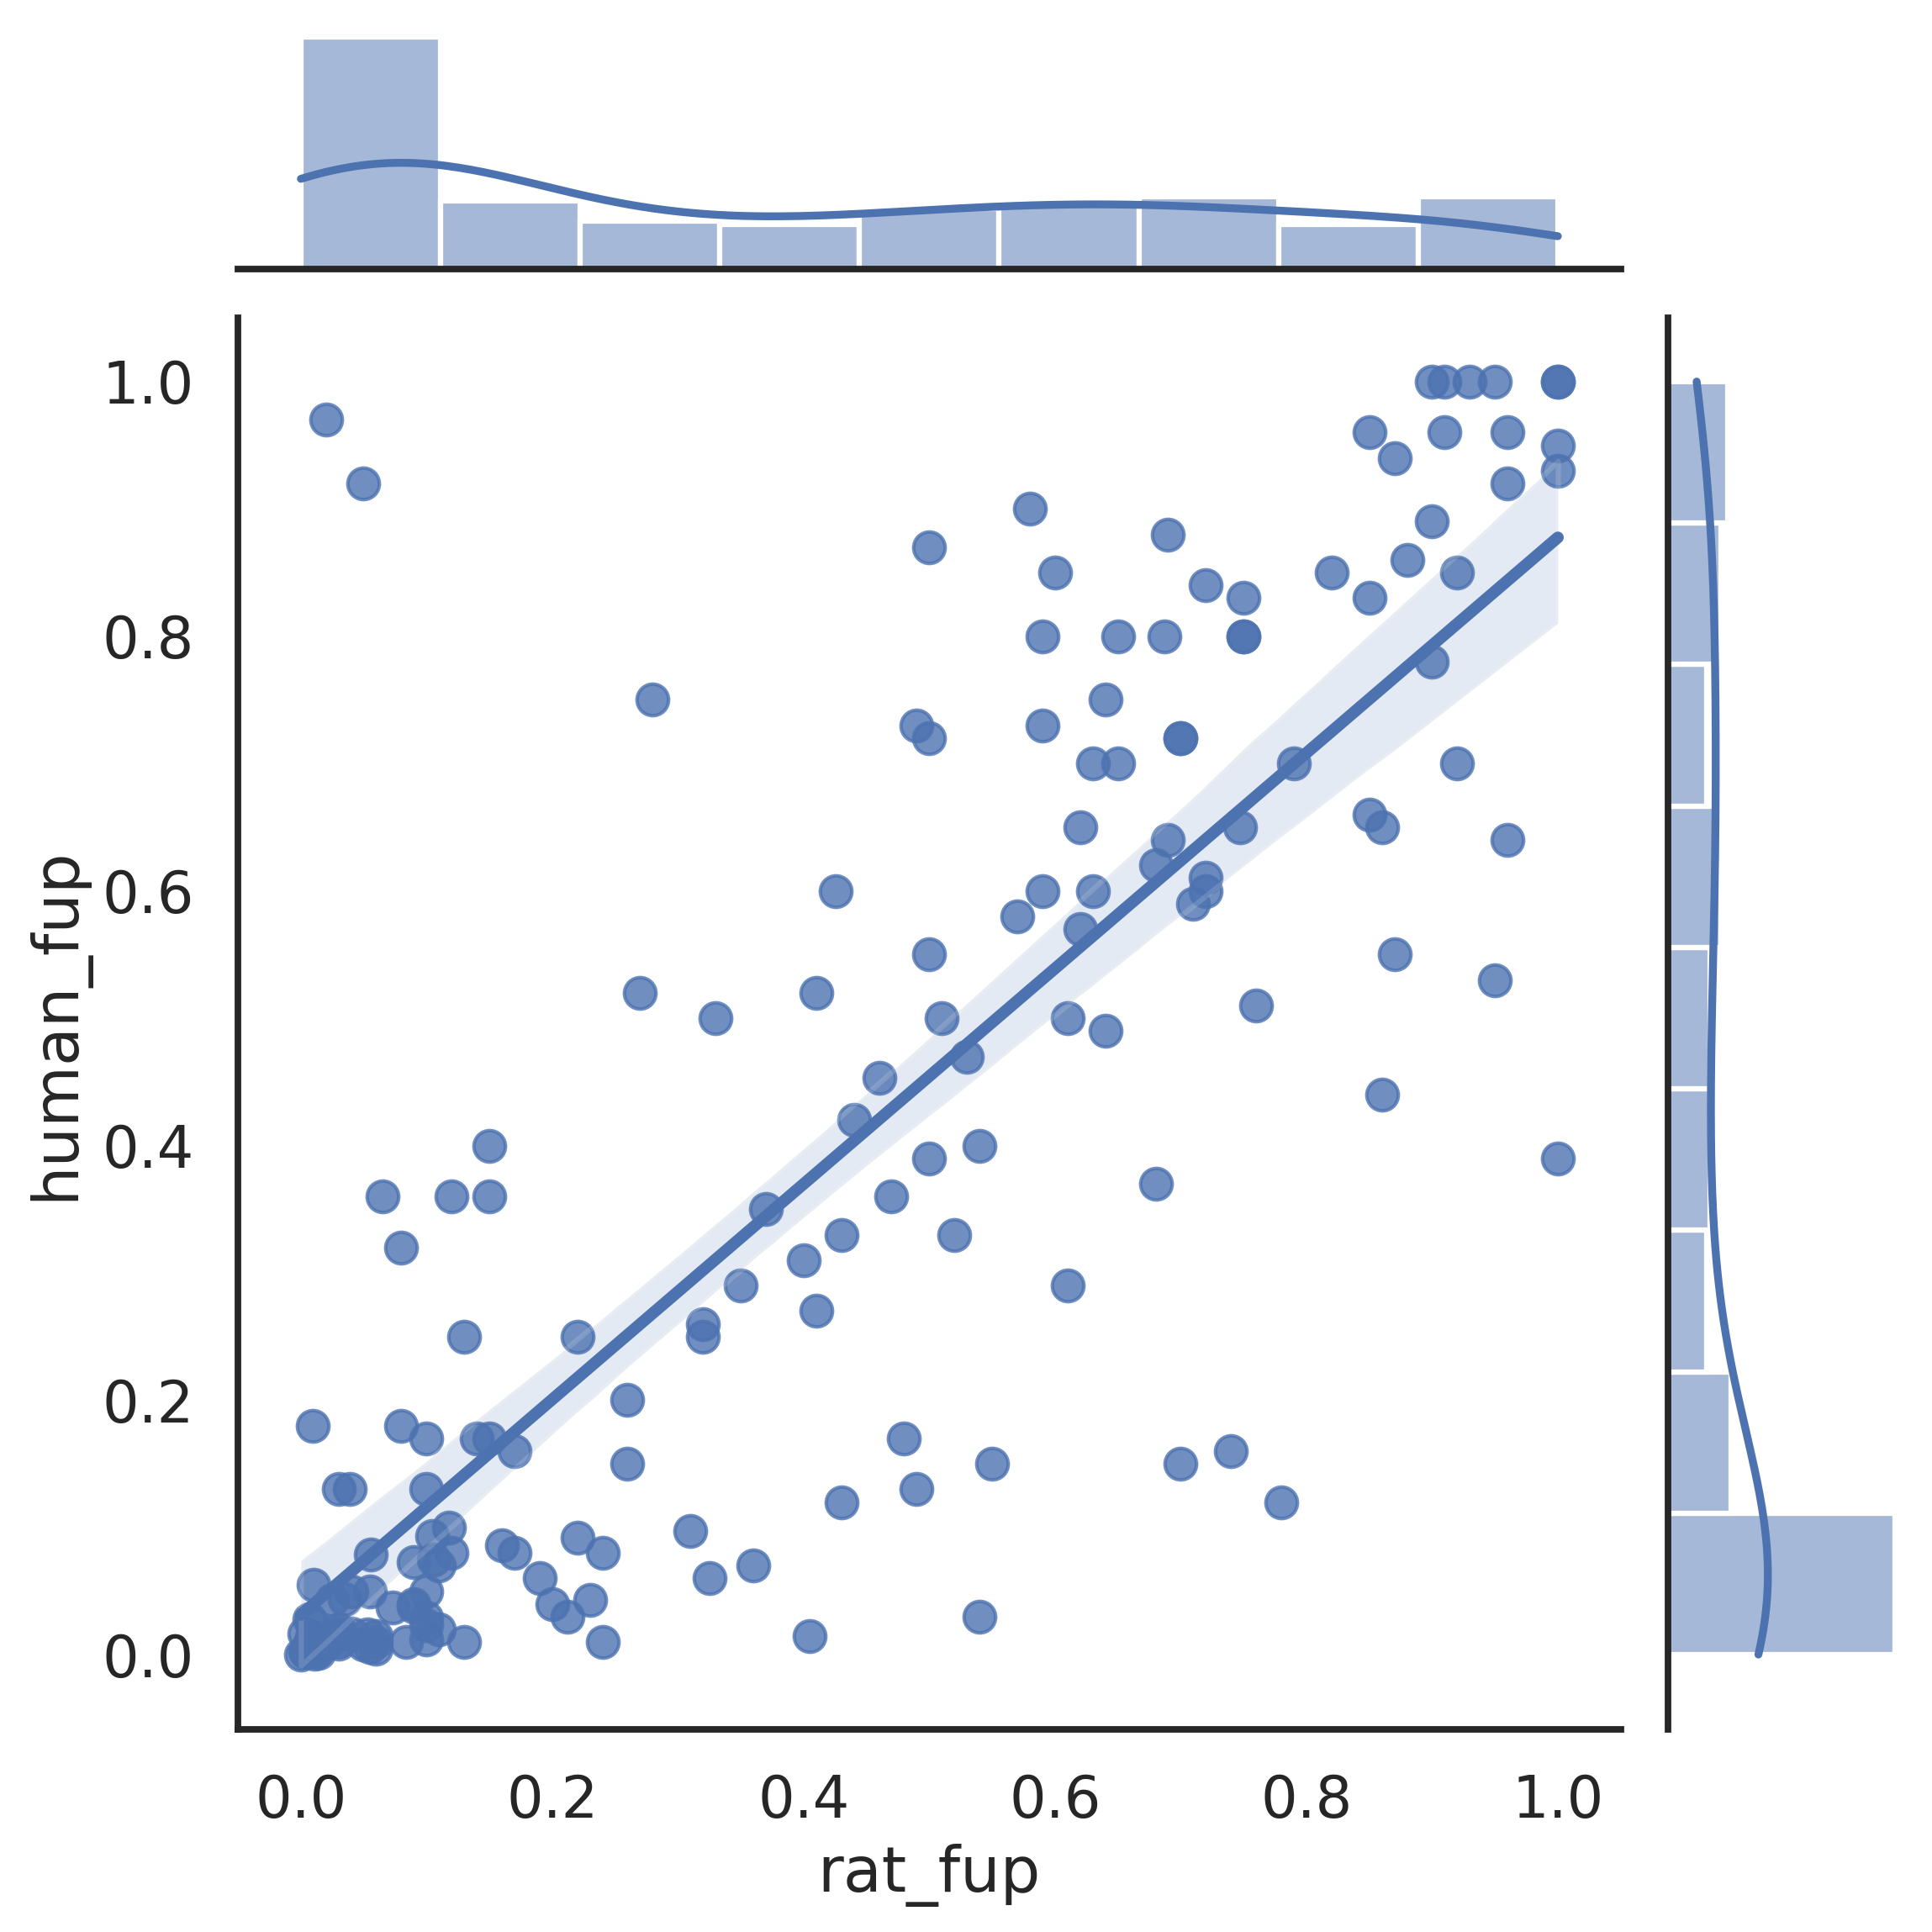

In [21]:
#Rat vs Human
sns.set_context("talk")
sns.set_style('white')

x = pd.merge(rat, human_lombardo)["rat_fup"].values.reshape((-1, 1))
print(len(x))
y = pd.merge(rat, human_lombardo)["human_fup"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


sns.jointplot(x="rat_fup", y="human_fup", 
               data=data[["smiles_r", "rat_fup","human_fup"]].dropna(how='any'),
                kind="reg", height=8)

139
coefficient of determination: 0.568425843700372


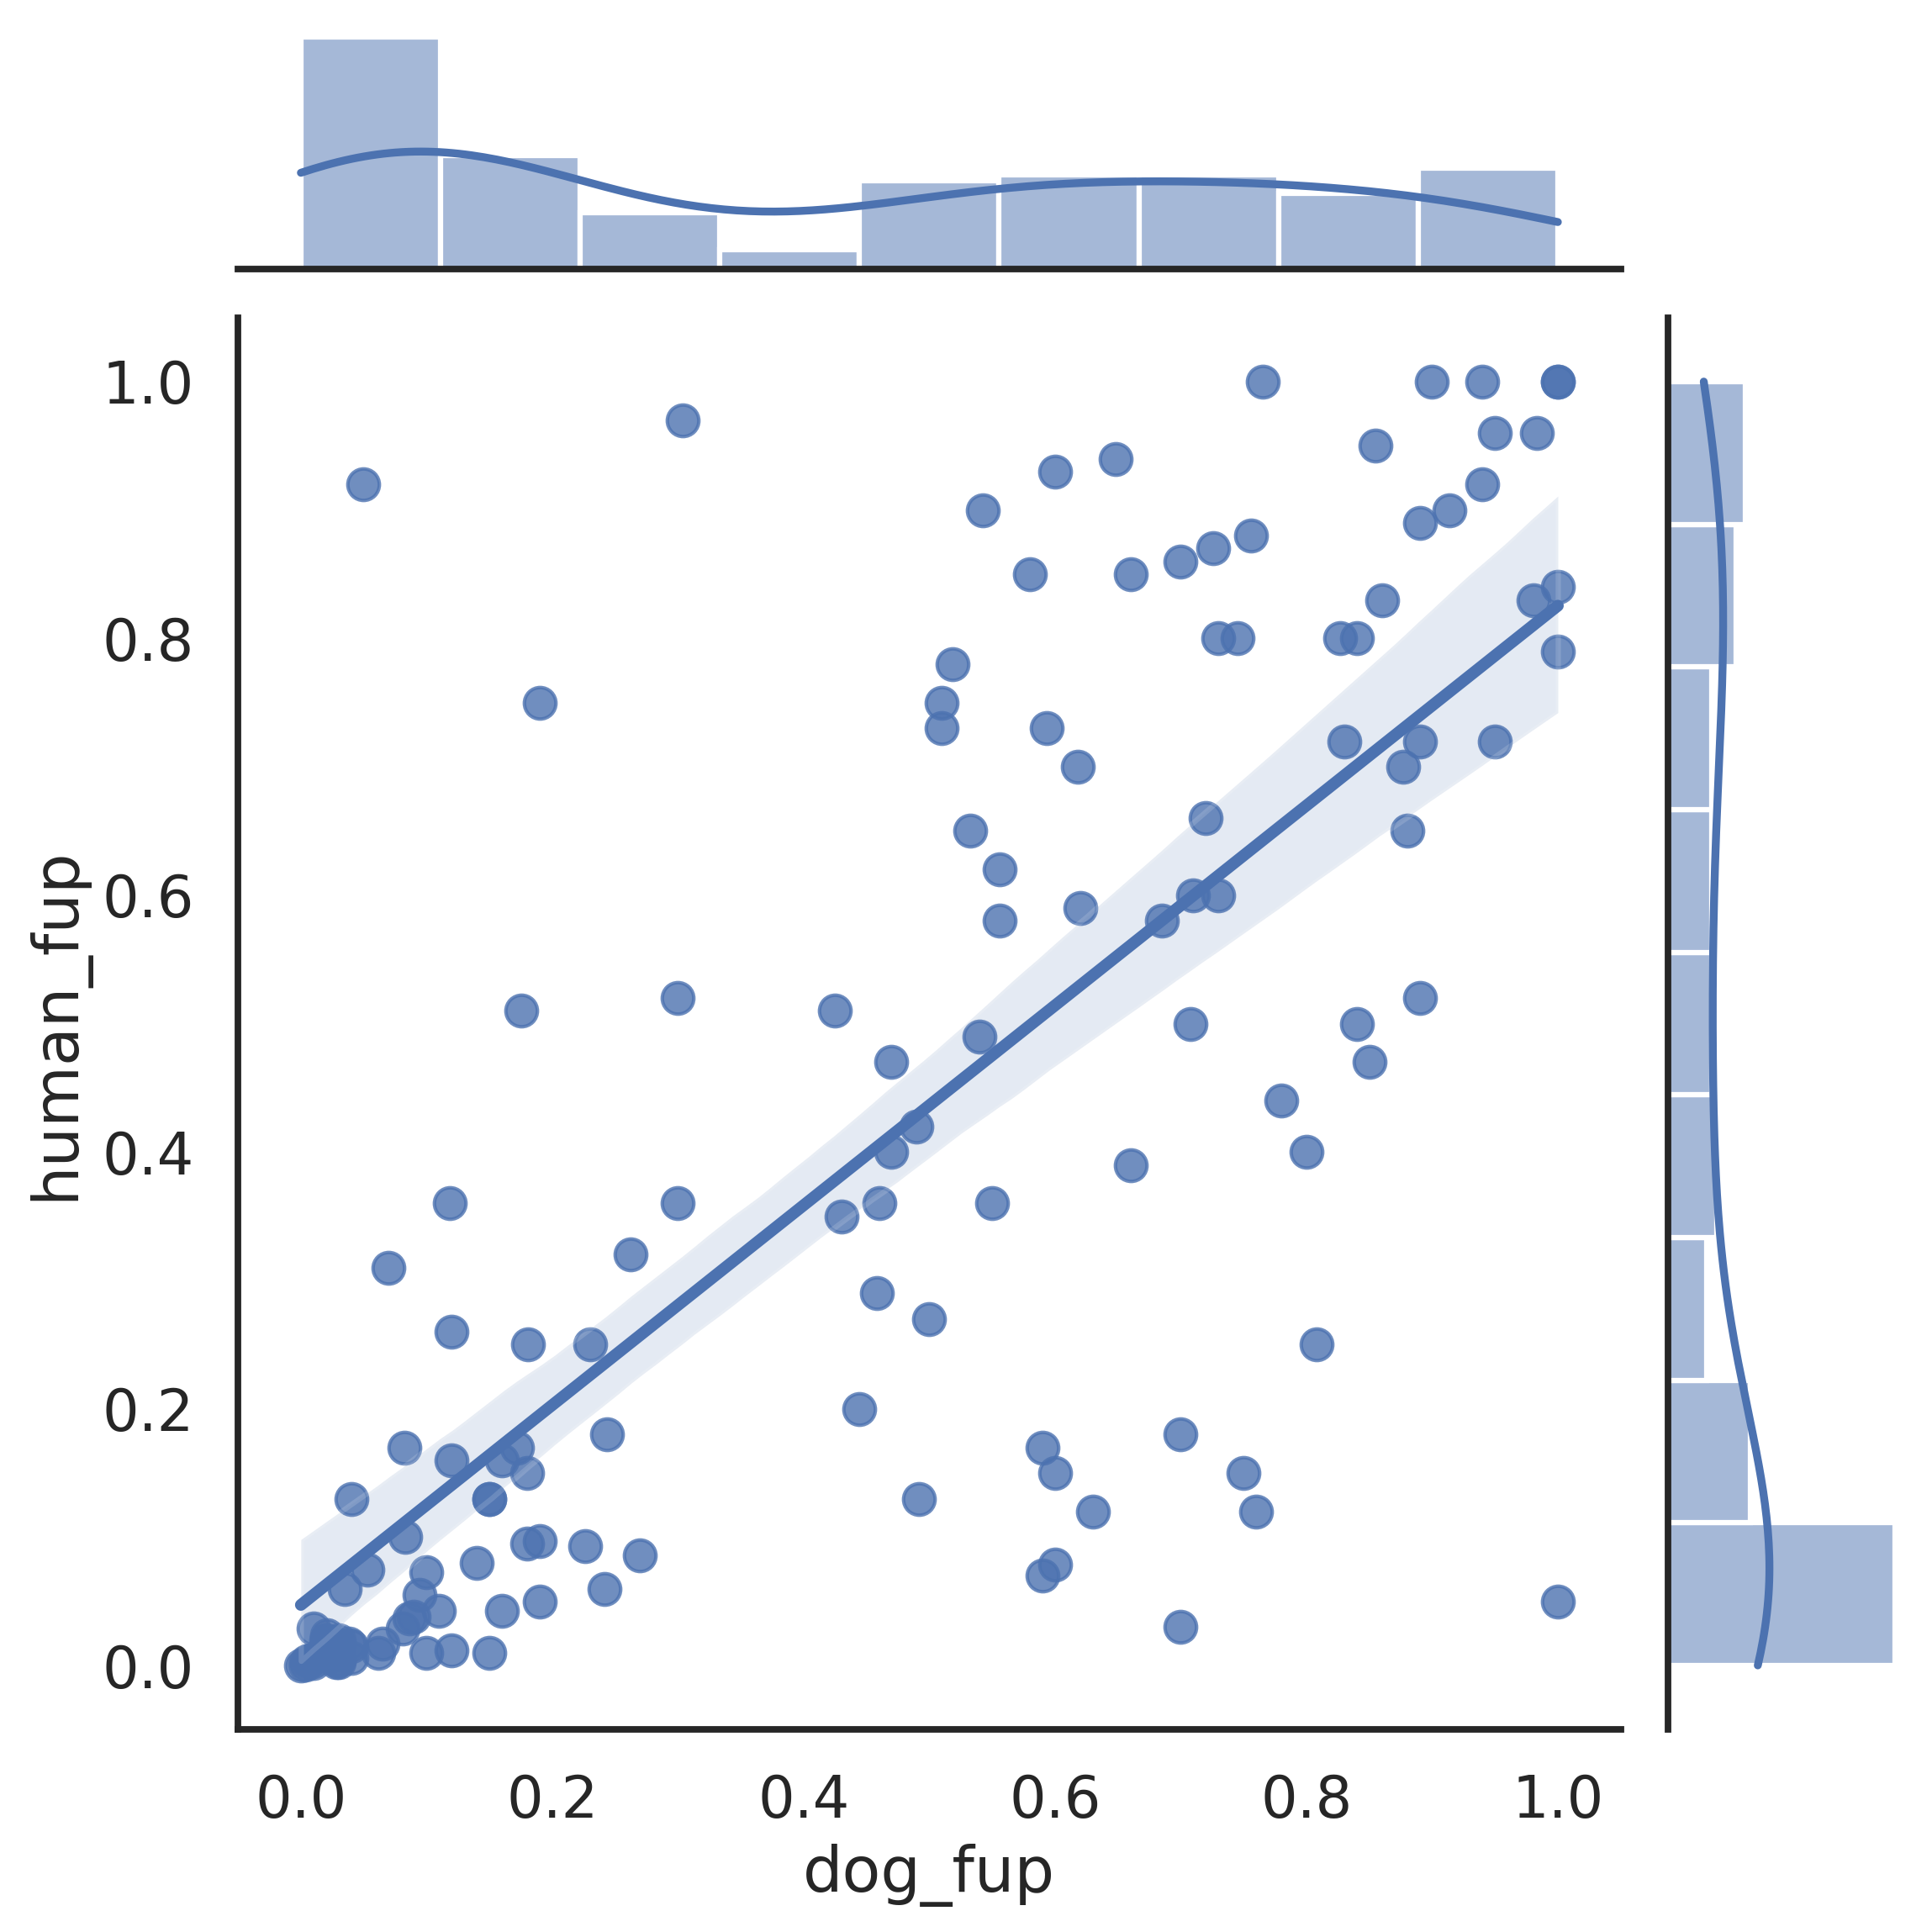

In [22]:
#dog vs Human
sns.set_context("talk")
sns.set_style('white')

x = pd.merge(dog, human_lombardo)["dog_fup"].values.reshape((-1, 1))
print(len(x))
y = pd.merge(dog, human_lombardo)["human_fup"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


sns.jointplot(x="dog_fup", y="human_fup", 
               data=data[["smiles_r", "dog_fup","human_fup"]].dropna(how='any'),
                kind="reg", height=8)

68
coefficient of determination: 0.5271239170722113


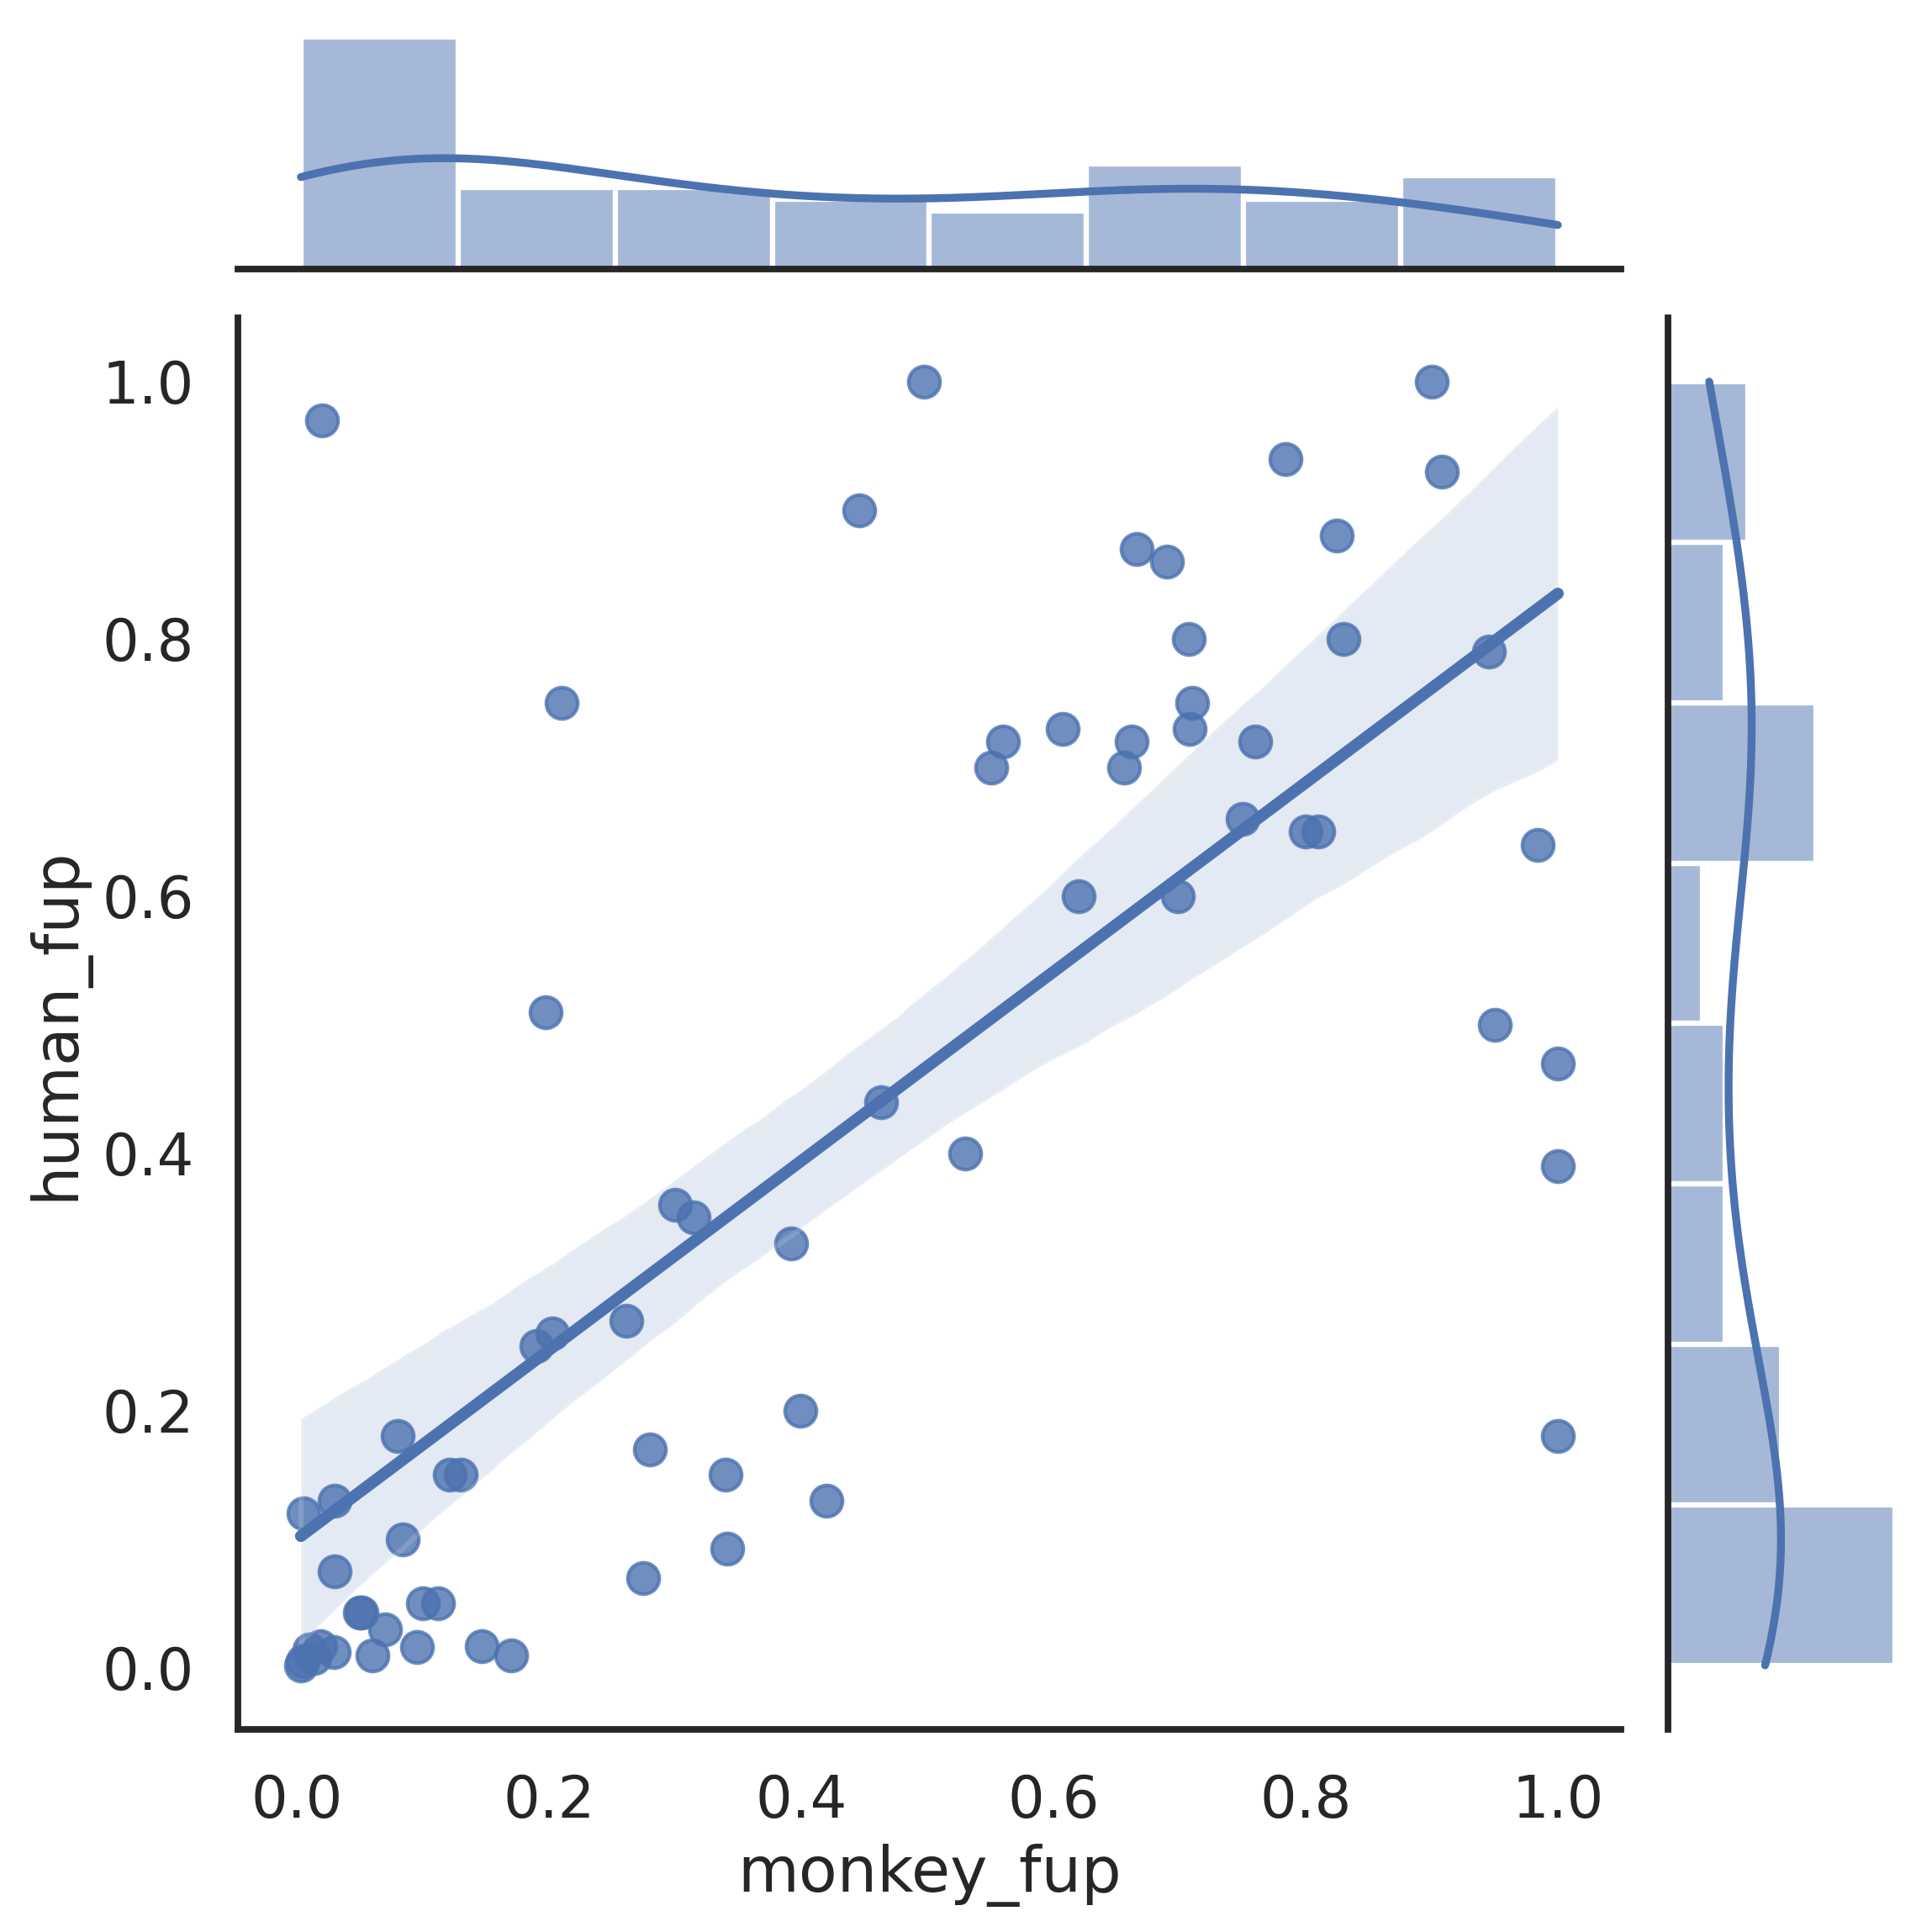

In [23]:
sns.set_context("talk")
sns.set_style('white')

import matplotlib.pyplot as plt
#monkey vs Human
x = pd.merge(monkey, human_lombardo)["monkey_fup"].values.reshape((-1, 1))
print(len(x))
y = pd.merge(monkey, human_lombardo)["human_fup"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


sns.jointplot(x="monkey_fup", y="human_fup", 
               data=data[["smiles_r", "monkey_fup","human_fup"]].dropna(how='any'),
                kind="reg", height=8)

#plt.xlim(-4, 0)
#plt.xlim(0, -4)
plt.show()

68
coefficient of determination: 0.6699566001567103


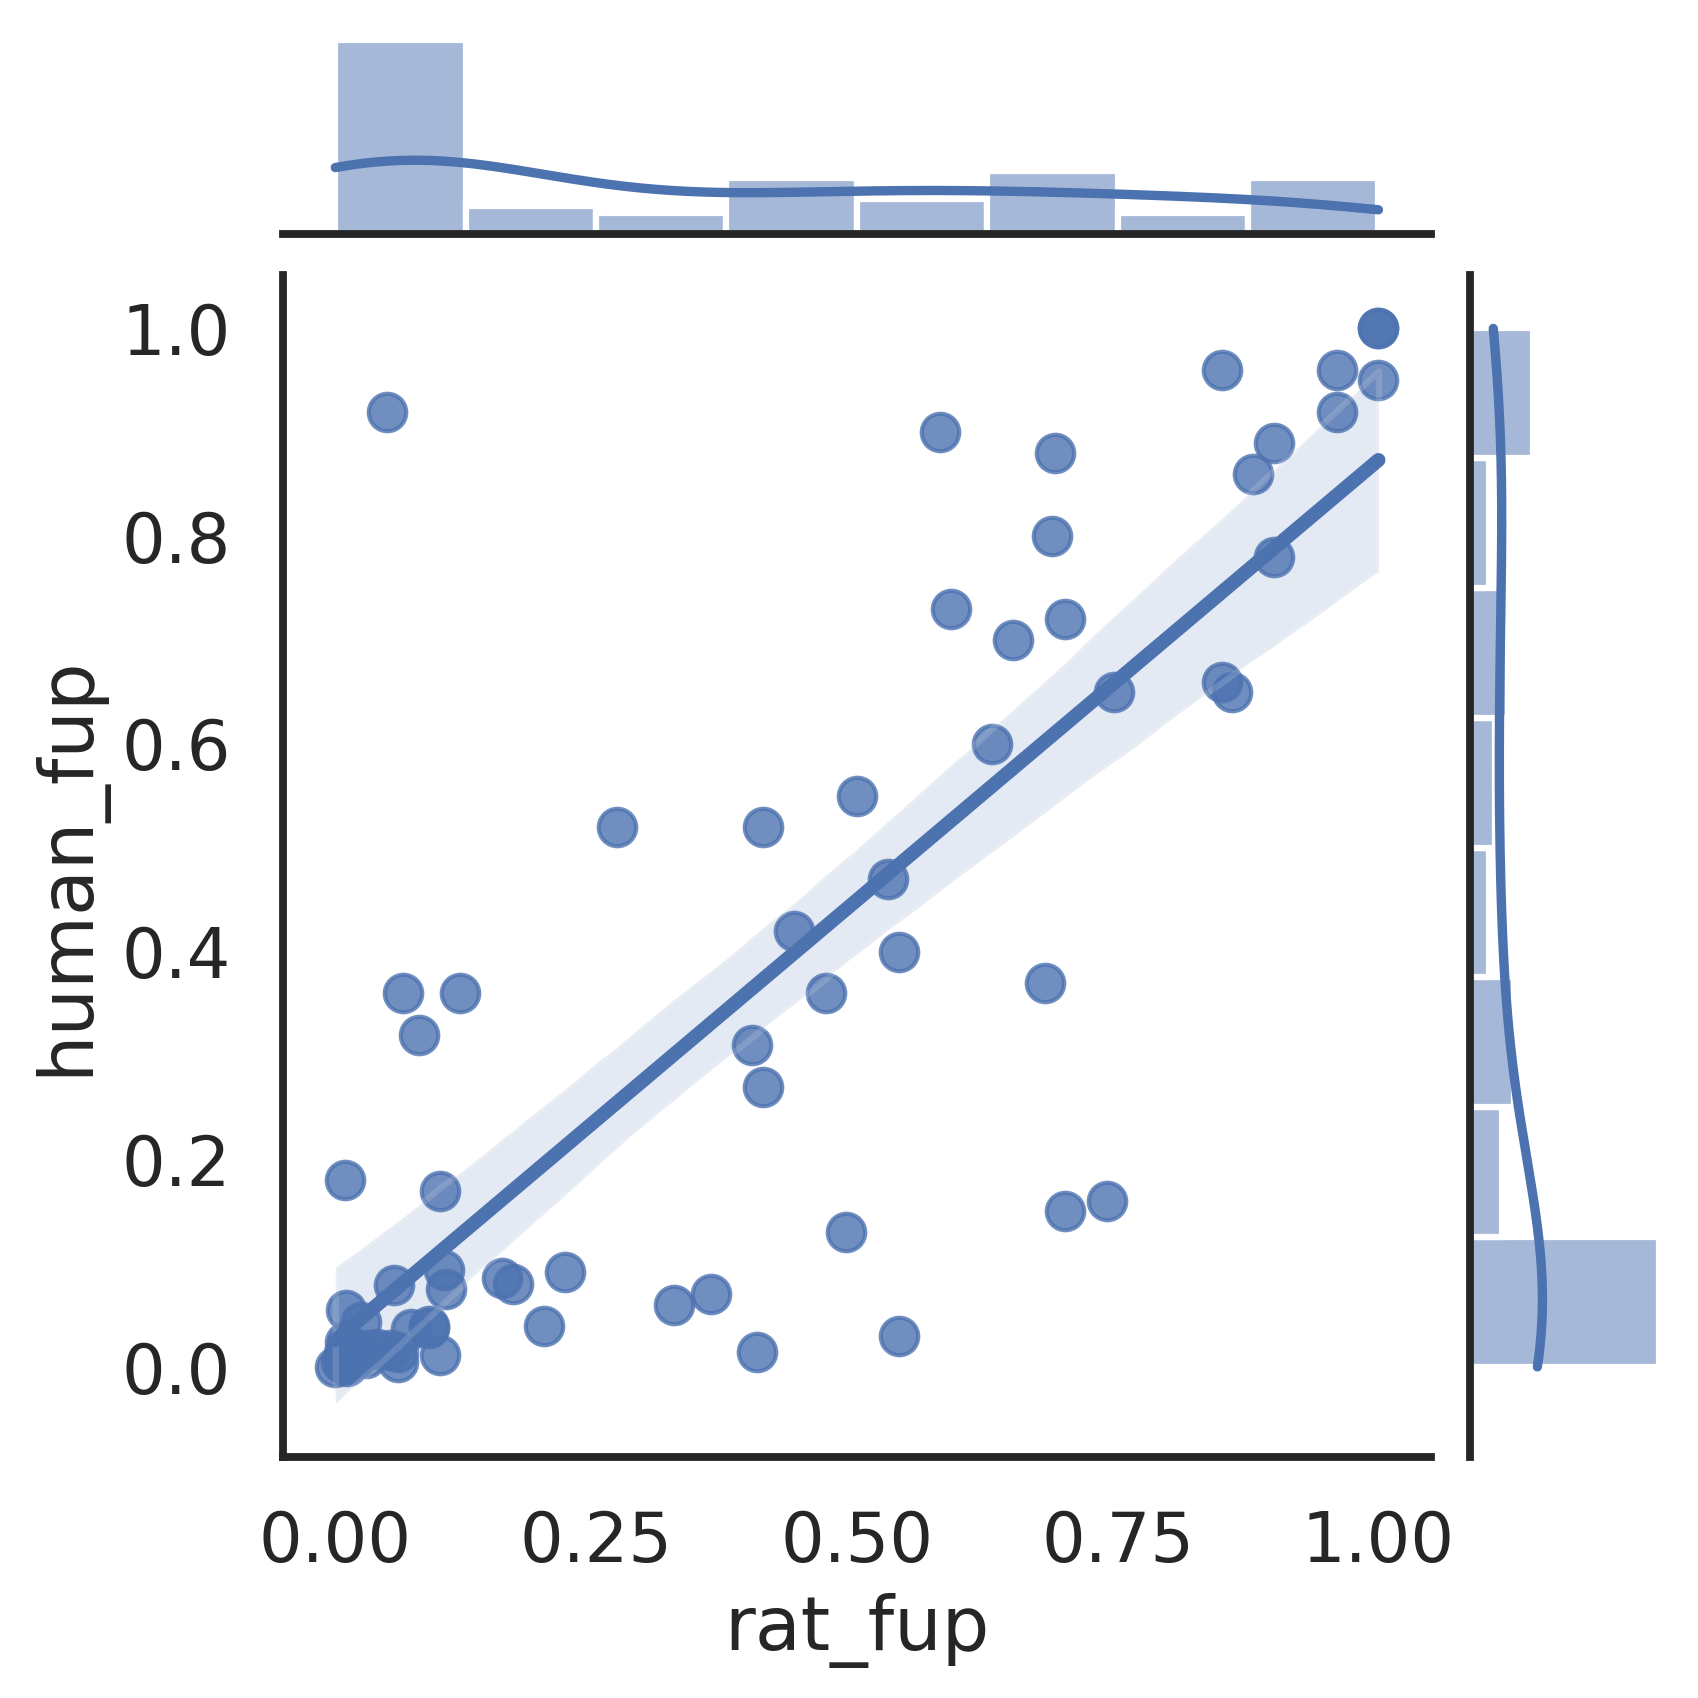

In [24]:
#Rat vs Human resampled
df = pd.merge(rat, human_lombardo).sample(68)

x = df["rat_fup"].values.reshape((-1, 1))
print(len(x))
y = df["human_fup"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


sns.jointplot(x="rat_fup", y="human_fup", 
               data=df,
                kind="reg")
#plt.ylim(-2, 2)
#plt.ylim(-2, 2)
plt.show()

68
coefficient of determination: 0.5301219083665392


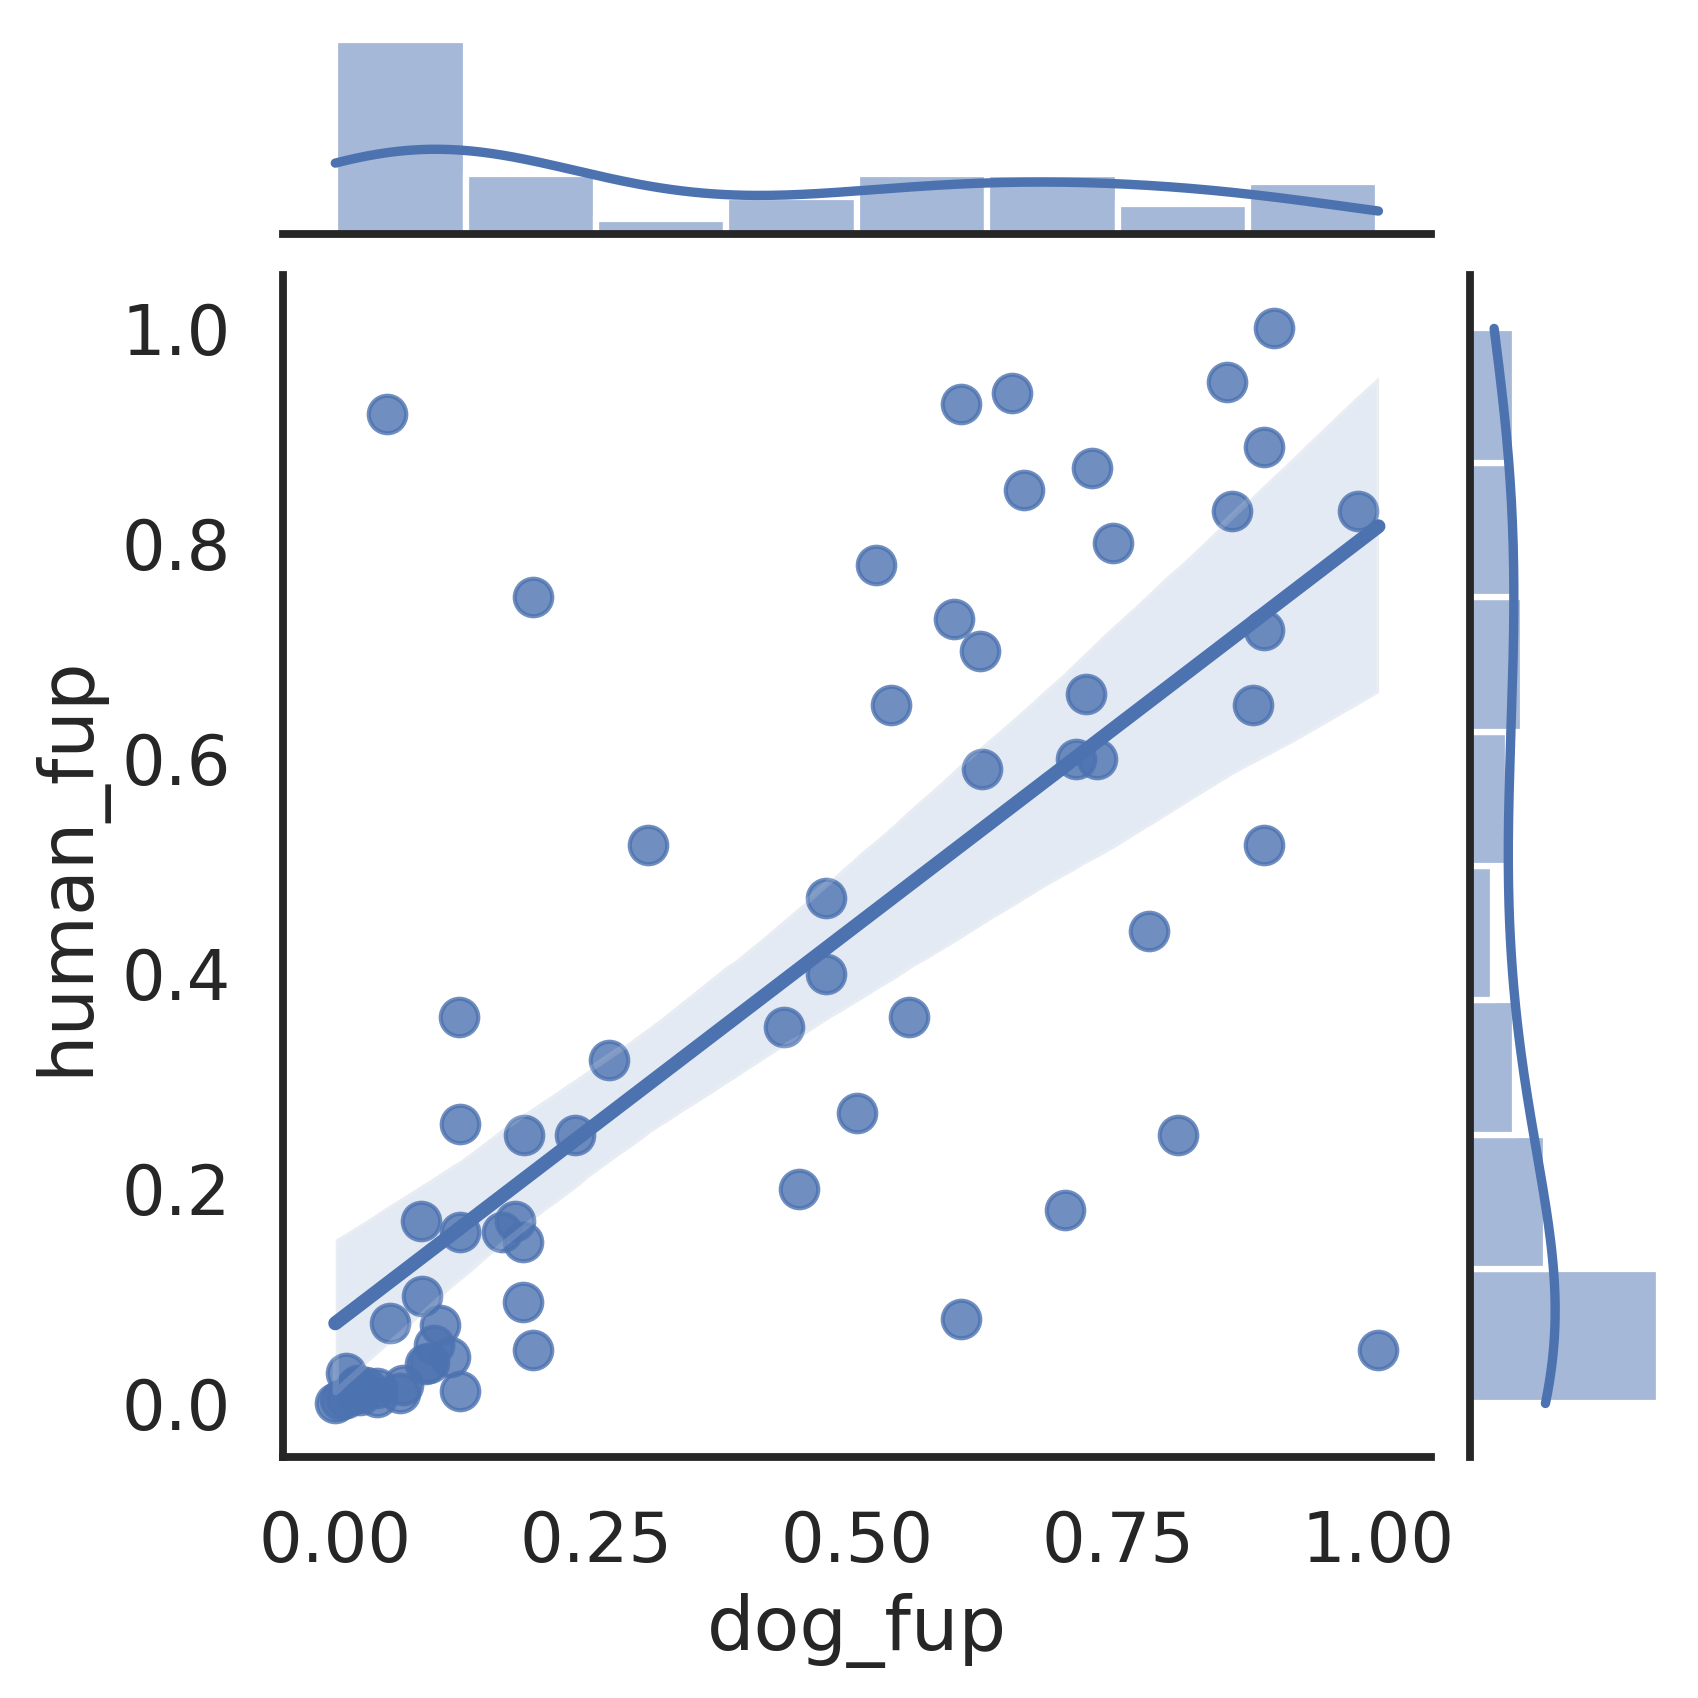

In [25]:
#dog vs Human resampled
df = pd.merge(dog, human_lombardo).sample(68)

x = df["dog_fup"].values.reshape((-1, 1))
print(len(x))
y = df["human_fup"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)



sns.jointplot(x="dog_fup", y="human_fup", 
               data=df,
                kind="reg")
#plt.ylim(-2, 2)
#plt.ylim(-2, 2)
plt.show()

In [24]:
df

,smiles_r,dog_fup,human_fup
106,CC(C)[NH2+]CC(O)COc1cccc2ccccc12,0.0400,0.130
39,C[NH+](C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,0.4444,0.200
12,Cc1cc(=O)n(-c2ccccc2)n1C,0.6000,0.930
15,C[NH2+]CC[C@@H](Oc1ccccc1C)c1ccccc1,0.0300,0.020
20,CC(C)[NH2+]CC(O)COc1ccc(CCOCC2CC2)cc1,0.4700,0.400
...,...,...,...
87,COC(=O)C1=C(C)[NH2+]C(C)=C(C(=O)OCC[NH+](C)Cc2...,0.0620,0.010
101,C[C@]12C=CC(=O)C=C1CC[C@@H]1C2C(=O)C[C@@]2(C)[...,0.5000,0.270
27,Cc1nnc(SCC2=C(C(=O)[O-])[NH+]3C(=O)C(NC(=O)Cn4...,0.7000,0.180
65,NS(=O)(=O)c1cc(C(=O)[O-])c(NCc2ccco2)cc1Cl,0.1200,0.012


In [25]:
data_all = data.dropna(how='any')
data_all.reset_index(drop=True, inplace=True)
data_all

,smiles_r,rat_fup,dog_fup,human_fup,monkey_fup
0,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,0.6300,0.6180,0.7000,0.6556
1,C[NH+](C)CCc1c[nH]c2ccc(CS(=O)(=O)[NH+]3CCCC3)...,0.7200,0.7300,0.6000,0.6989
2,Cc1cc(=O)n(-c2ccccc2)n1C,1.0000,0.6000,0.9300,0.9083
3,CC(C)[NH2+]CC(O)COc1ccc(CC(N)=O)cc1,0.8700,0.6485,0.9400,0.7837
4,C[C@H]1C(=NC(=O)C(NOC(C)(C)C(=O)[O-])c2csc(N)n...,0.1500,0.8000,0.4000,0.5300
5,O=C([O-])CCNC(=O)c1ccccc1,0.1400,0.5900,0.1700,0.2800
6,CC(C)[NH2+]CC(O)COc1ccc(COCCOC(C)C)cc1,0.8500,0.7200,0.6600,0.7500
7,CCCC[NH+]1CCCCC1C(=O)Nc1c(C)cccc1C,0.2300,0.1100,0.0430,0.0510
8,NC(=O)OC[C@@H]1C(=NC(=O)C(NOCC(=O)[O-])c2csc(N...,0.7000,0.8900,0.7200,0.7600
9,Cc1nnc(SCC2=C(C(=O)[O-])[NH+]3C(=O)C(NC(=O)Cn4...,0.0800,0.7000,0.1800,0.0800
